Initial setup and first topic model run

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run "Common setup.ipynb"

In [3]:
# Read in data from temporary cache file
# RC = mk.RecordCollection("tmp/filtered_corpora.txt")

# NOTE that the above appears to load in an older version of the filtered corpora!!!

RC = mk.RecordCollection("tmp/rest_filtered_corpora.txt")

In [4]:
corpora_df = wosis.rec_to_df(RC)
topic_results = wosis.find_topics(corpora_df, num_topics=6)

Topic 1: model parameters sensitivity models data analysis parameter flow calibration time
Topic 2: optimization design method shape topology problem element sensitivity structural finite
Topic 3: uncertainty stochastic quantification carlo monte method bayesian uncertainties random polynomial
Topic 4: emissions energy production carbon environmental emission cost gas cycle life
Topic 5: water soil river quality groundwater climate change management runoff land
Topic 6: risk exposure assessment health cancer risks human flood decision probabilistic


Now we check that a specific paper of interest was included in one of the topics as a high-level check 

    Title: "Uncertainty in the environmental modelling process - A framework and guidance"
    DOI: "10.1016/j.envost.2007.02.004"

In [5]:
# find paper of interest - see if it's still in the corpora
# tmp_df = topic_results.corpora_df  
# tmp_df.loc[tmp_df.id == 'WOS:000248233200001']

# for i in range(topic_results.num_topics):
#     topic_id = i + 1
#     tmp_topic = topic_results.get_topic_by_id(topic_id)
#     print("topic_id", topic_id)
#     print(tmp_topic.loc[tmp_topic.id == 'WOS:000248233200001']['id'])

# relevant_topic = topic_results.find_paper_by_id('WOS:000248233200001')

relevant_topic = topic_results.find_paper_by_doi('10.1016/j.envost.2007.02.004')

Found in topic 3


We then select topic 1 and 3 (taken to be the model parameter senstivity and uncertainty topics respectively)

In [6]:
# subtopic1 = topic_results.get_topic_by_id(1)
# subtopic4 = topic_results.get_topic_by_id(4)

# model_param_rc = wosis.extract_recs(subtopic1['id'], RC, name='model_param')
# uncert_risk_rc = wosis.extract_recs(subtopic4['id'], RC, name='uncert_risk')

model_param_df = topic_results.get_topic_by_id(1)
uncertainty_df = topic_results.get_topic_by_id(3)

model_param_rc = wosis.extract_recs(model_param_df.id, RC, name='model_param')
uncertainty_rc = wosis.extract_recs(uncertainty_df.id, RC, name='uncertainty')

These sub-topics are then combined to represent the UA/SA research area

In [7]:
# from functools import reduce
# topics_combined = reduce(lambda x, y: x + y, [model_param_rc, uncert_risk_rc])

# topics_combined_df = wosis.rc_to_df(topics_combined)
# topics_combined_df.to_csv('../data/topics_combined.csv')

model_param_and_uncertainty =  model_param_rc + uncertainty_rc

param_and_uncert_df = wosis.rc_to_df(model_param_and_uncertainty) 
param_and_uncert_df.to_csv('../data/param_and_uncert_combined.csv')

We then apply the topic model again to further constrain the number of publications

In [8]:
param_and_uncert_subtopics = wosis.find_topics(param_and_uncert_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models flow parameter based results
Topic 2: stochastic random polynomial method chaos quantification expansion equations collocation problems
Topic 3: uncertainty bayesian uncertainties carlo monte analysis model models quantification parameter
Topic 4: neural network ann artificial networks prediction models regression variables training
Topic 5: rainfall runoff flood hydrological model catchment calibration watershed distributed flow


<hr>

Plotting subtopic trends over time. <br>
Two topics are chosen, papers focusing on applications of SA and papers focusing on theoretical development of SA. <br>
The next task is to superimpose the category trends over time. <br>
Journal publication trends and top cited papers to indicate which fields are applying or interested in the theory of UA/SA. <br>
Author citation networks to indicate which fields are collaborating, and journal networks.

In [9]:
# subtopic1 = topics_combined_set.get_topic_by_id(1)
# subtopic4 = topics_combined_set.get_topic_by_id(4)

SA_topic_df = param_and_uncert_subtopics.get_topic_by_id(1)
UA_topic_df = param_and_uncert_subtopics.get_topic_by_id(3)

sa_rc = wosis.extract_recs(SA_topic_df.id, RC, name='SA')
ua_rc = wosis.extract_recs(UA_topic_df.id, RC, name='UA')

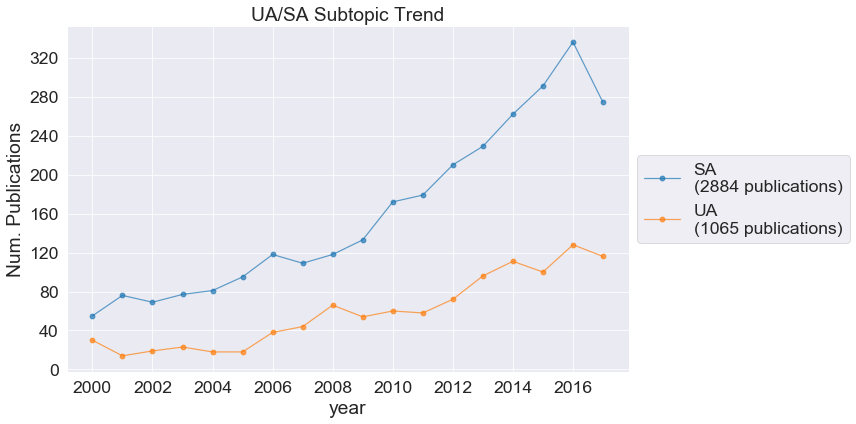

In [10]:
wos_plot.plot_topic_trend([sa_rc, ua_rc], title='UA/SA Subtopic Trend', save_plot_fn='figs/Subtopic Trend')

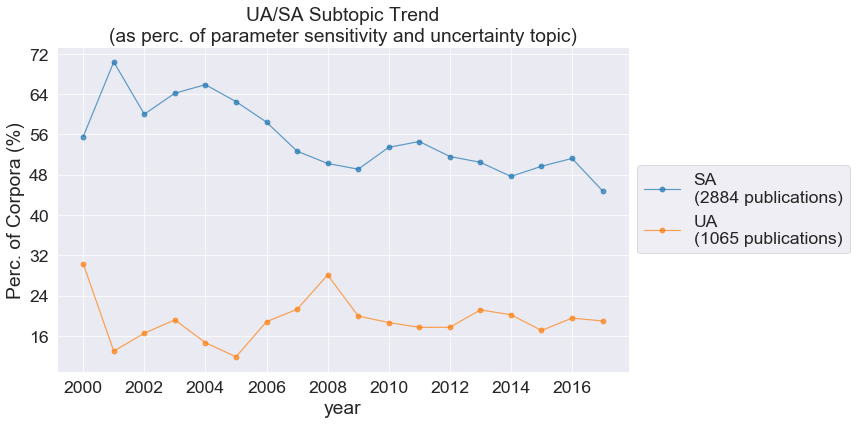

In [11]:
wos_plot.plot_topic_trend([sa_rc, ua_rc], 
                          total_rc=model_param_and_uncertainty, 
                          title='UA/SA Subtopic Trend\n(as perc. of parameter sensitivity and uncertainty topic)', 
                          save_plot_fn='figs/UA-SA Sub-topic Trend Percentage')

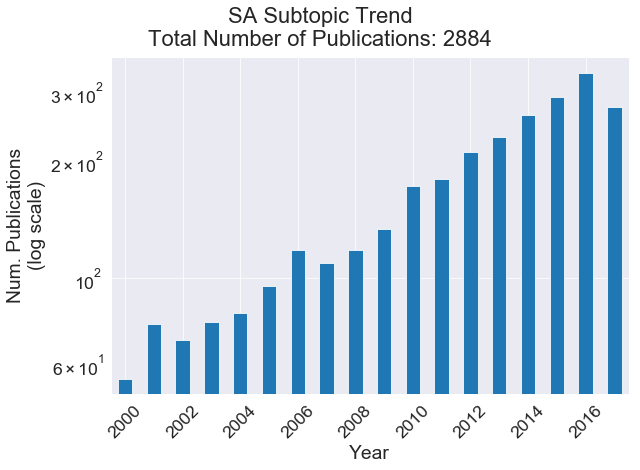

In [12]:
wos_plot.plot_pub_trend(sa_rc, title='SA Subtopic Trend', save_plot_fn='figs/sa_trend_2000-2017.png')

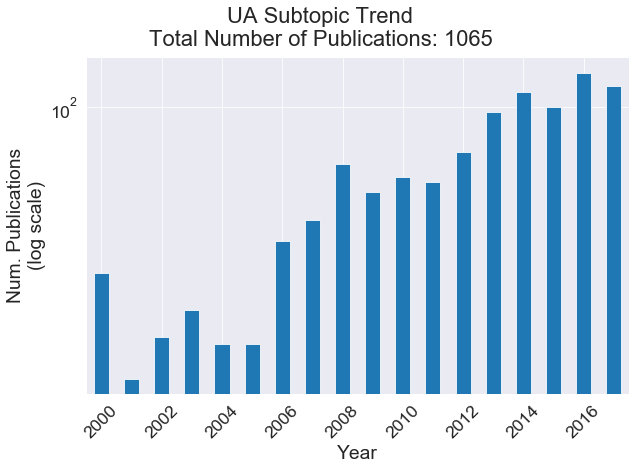

In [13]:
wos_plot.plot_pub_trend(ua_rc, title='UA Subtopic Trend', save_plot_fn='figs/ua_trend_2000-2017.png')

<hr>
Crtieria matching the subtopics

In [14]:
# subtopics_combined = reduce(lambda x, y: x + y, [sa_rc, ua_rc])

uasa_subtopics = sa_rc + ua_rc

In [15]:
wosis.rc_to_df(uasa_subtopics).to_csv('../data/uasa_subtopics_combined.csv')

1. Frameworks and guidelines for UA/SA

In [16]:
uasa_framework = wosis.keyword_matches(uasa_subtopics, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [17]:
all_framework = uasa_framework.combine_recs()

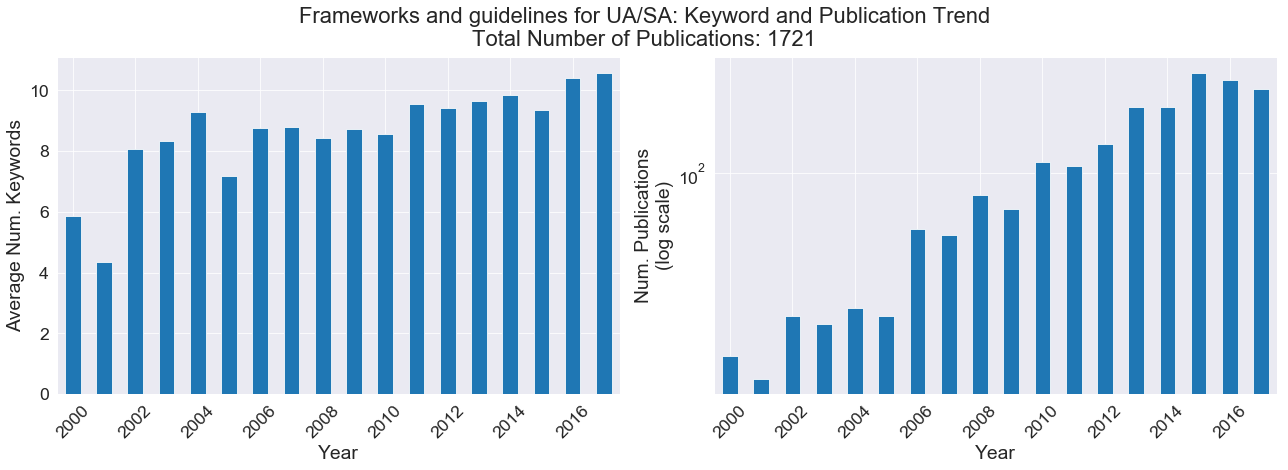

In [18]:
wos_plot.plot_kw_trend(all_framework, title='Frameworks and guidelines for UA/SA: Keyword and Publication Trend', save_plot_fn='figs/framework_pub_trend.png')

2. Applications of UA/SA

In [19]:
applications = wosis.keyword_matches(uasa_subtopics, 
                                     ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment'], 
                                     threshold=95.0)

In [20]:
all_applications = applications.combine_recs()

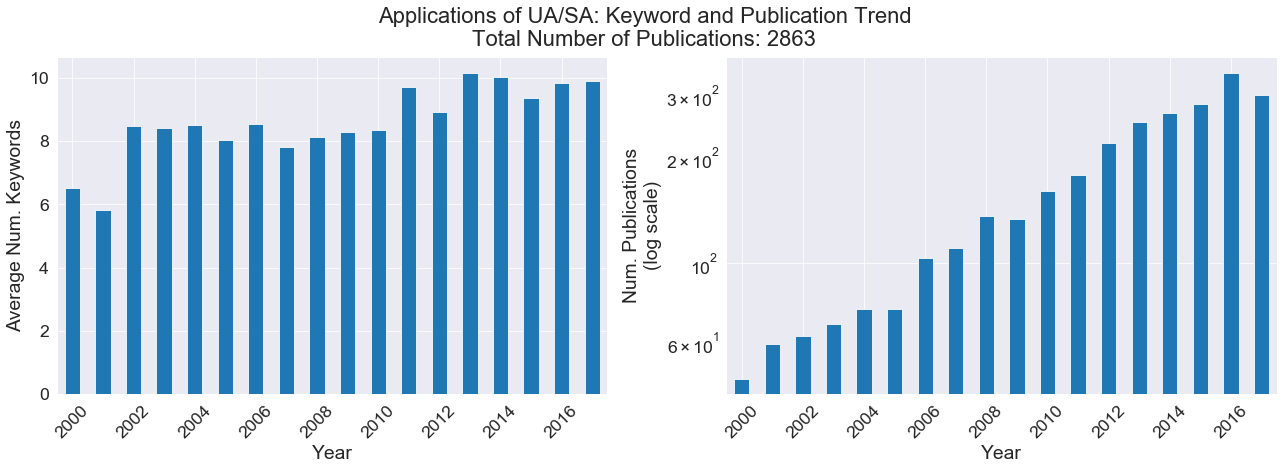

In [21]:
wos_plot.plot_kw_trend(all_applications, 
                       title='Applications of UA/SA: Keyword and Publication Trend', 
                       save_plot_fn='figs/app_pub_trend.png')

Publication Trends for application and framework papers

In [22]:
# Resetting name of RecordCollections for plot
all_applications.name = 'Applications'
all_framework.name = 'Frameworks'

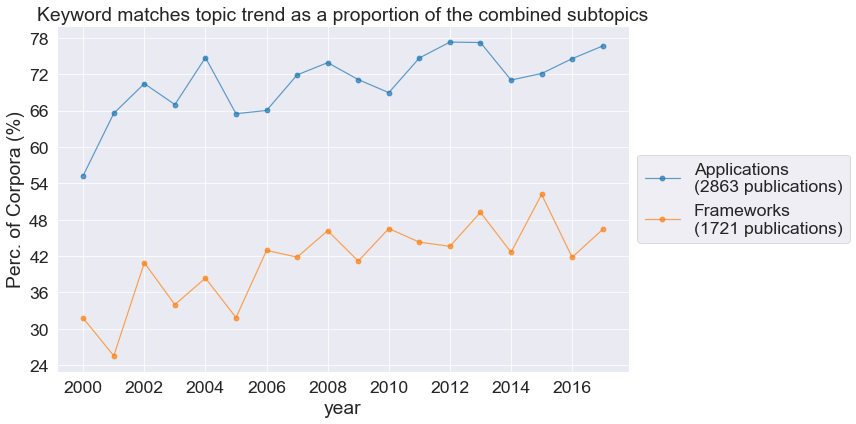

In [23]:
wos_plot.plot_topic_trend([all_applications, all_framework], 
                          total_rc=uasa_subtopics, 
                          title='Keyword matches topic trend as a proportion of the combined subtopics', 
                          save_plot_fn='figs/combined_topics_keyword_trend_percentage.png')

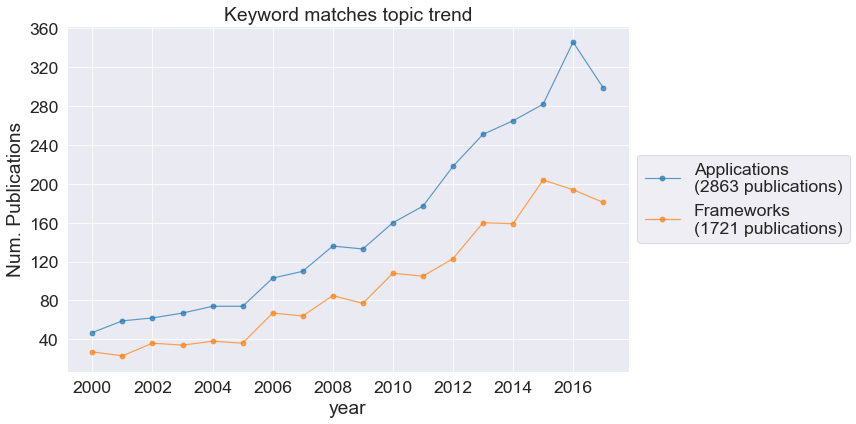

In [24]:
wos_plot.plot_topic_trend([all_applications, all_framework], 
                          title='Keyword matches topic trend', 
                          save_plot_fn='figs/combined_topics_keyword_trend.png')

Top cited journals
<br> 1. Framework

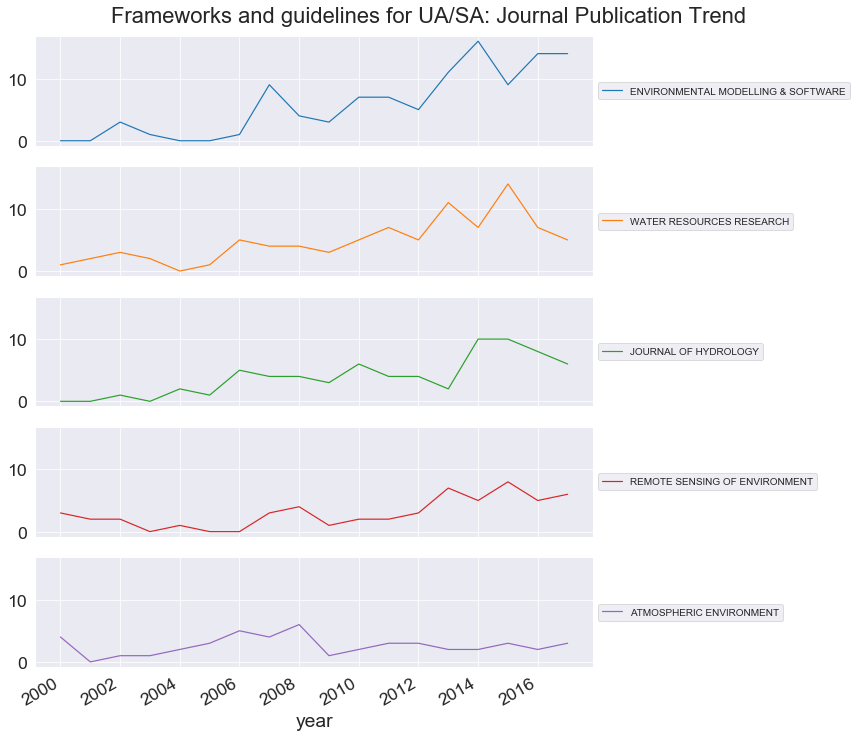

In [25]:
wos_plot.plot_journal_pub_trend(all_framework, 
                                top_n=5, 
                                save_plot_fn='figs/framework_journal_pub_trend.png', 
                                title='Frameworks and guidelines for UA/SA: Journal Publication Trend')

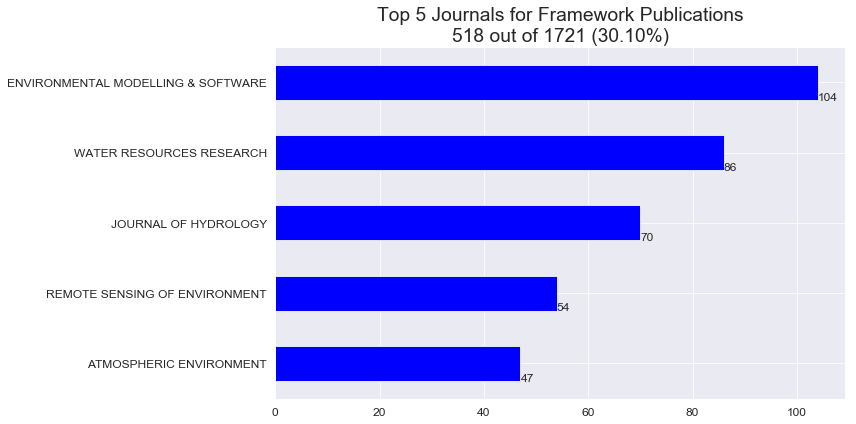

In [26]:
wos_plot.plot_pubs_per_journal(all_framework,
                               title="Top 5 Journals for Framework Publications",
                               top_n=5, 
                               annotate=True, 
                               show_stats=True, 
                               save_plot_fn='figs/framework_journal_pubs.png')

In [27]:
journals_of_interest_framework = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Water Resources Research'.upper(), 'Atmospheric Environment'.upper(), 'Hydrological Processes'.upper()]
pubs_for_journals_framework = wosis.find_pubs_by_journal(all_framework, journals_of_interest_framework)

Now we grab the number of citations for each paper across the journals from the WoS database

In [28]:
data_dir = "tmp"  # Using the temporary data directory

# Get citations for each paper
# Results are cached based on RecordCollection name (currently [topic name]_[Journal Name])
paper_citations_per_journal_framework = {}
for pubs in pubs_for_journals_framework:
    paper_citations_per_journal_framework[pubs] = wosis.get_num_citations(pubs_for_journals_framework[pubs], wos_config, 
                                                                    cache_dir=data_dir)

We found that sometimes the DOIs are incorrect - here we fix a known incorrect DOI link.

At the same time, we collate the top 10 papers from each journal

In [29]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link', 'id']
collection_framework = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_framework.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_framework = collection_framework.append(df[cols_of_interest][0:10], ignore_index=True)

In [30]:
top_cited_in_top_journals_framework = collection_framework.sort_values('citations', ascending=False)
top_cited_in_top_journals_framework.head(10)

,AU,year,title,journal,citations,DOI link,id
20,"Bennett, ND|Croke, BFW|Guariso, G|Guillaume, J...",2013,Characterising performance of environmental mo...,Frameworks_ENVIRONMENTAL MODELLING & SOFTWARE,585,https://dx.doi.org/10.1016/j.envsoft.2012.09.011,WOS:000314074000001
21,"Refsgaard, JC|van der Sluijs, JP|Hojberg, AL|V...",2007,Uncertainty in the environmental modelling pro...,Frameworks_ENVIRONMENTAL MODELLING & SOFTWARE,512,https://dx.doi.org/10.1016/j.envsoft.2007.02.004,WOS:000248233200001
22,"Merritt, WS|Letcher, RA|Jakeman, AJ",2003,A review of erosion and sediment transport models,Frameworks_ENVIRONMENTAL MODELLING & SOFTWARE,412,https://dx.doi.org/10.1016/S1364-8152(03)00078-1,WOS:000185453400010
30,"Yang, J|Reichert, P|Abbaspour, KC|Xia, J|Yang, H",2008,Comparing uncertainty analysis techniques for ...,Frameworks_JOURNAL OF HYDROLOGY,313,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012,WOS:000258853700001
40,"Russell, A|Dennis, R",2000,NARSTO critical review of photochemical models...,Frameworks_ATMOSPHERIC ENVIRONMENT,290,https://dx.doi.org/10.1016/S1352-2310(99)00468-9,WOS:000086195600018
10,"Gupta, HV|Wagener, T|Liu, YQ",2008,Reconciling theory with observations: elements...,Frameworks_HYDROLOGICAL PROCESSES,271,https://dx.doi.org/10.1002/hyp.6989,WOS:000259281300020
0,"Thiemann, M|Trosset, M|Gupta, H|Sorooshian, S",2001,Bayesian recursive parameter estimation for hy...,Frameworks_WATER RESOURCES RESEARCH,240,https://dx.doi.org/10.1029/2000WR900405,WOS:000171211300008
11,"Aronica, G|Bates, PD|Horritt, MS",2002,Assessing the uncertainty in distributed model...,Frameworks_HYDROLOGICAL PROCESSES,216,https://dx.doi.org/10.1002/hyp.398,WOS:000176935600007
41,"Li, XX|Liu, CH|Leung, DYC|Lam, KM",2006,Recent progress in CFD modelling of wind field...,Frameworks_ATMOSPHERIC ENVIRONMENT,185,https://dx.doi.org/10.1016/j.atmosenv.2006.04.055,WOS:000240524600011
23,"Chen, Y|Yu, J|Khan, S",2010,Spatial sensitivity analysis of multi-criteria...,Frameworks_ENVIRONMENTAL MODELLING & SOFTWARE,170,https://dx.doi.org/10.1016/j.envsoft.2010.06.001,WOS:000282655200009


In [31]:
export_ds = top_cited_in_top_journals_framework.loc[:, top_cited_in_top_journals_framework.columns != 'id']
export_ds.to_csv('../data/framework_top_cited_in_top_journals.csv', index=False)

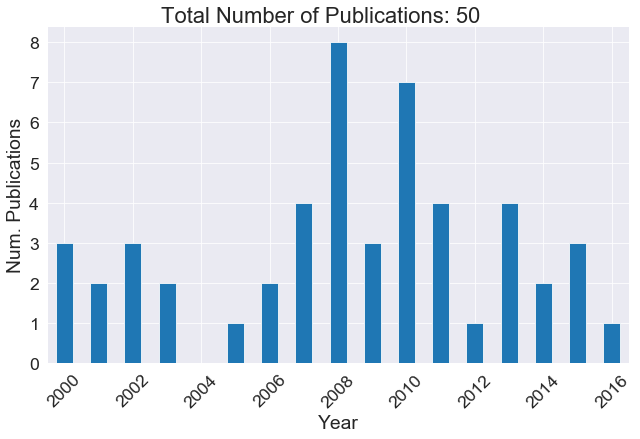

In [32]:
# top_cited_in_top_journals_framework.groupby('year').count()['AU'].plot()
framework_top_cited = wosis.extract_recs(top_cited_in_top_journals_framework.id, RC)
wos_plot.plot_pub_trend(framework_top_cited)

2. Applications

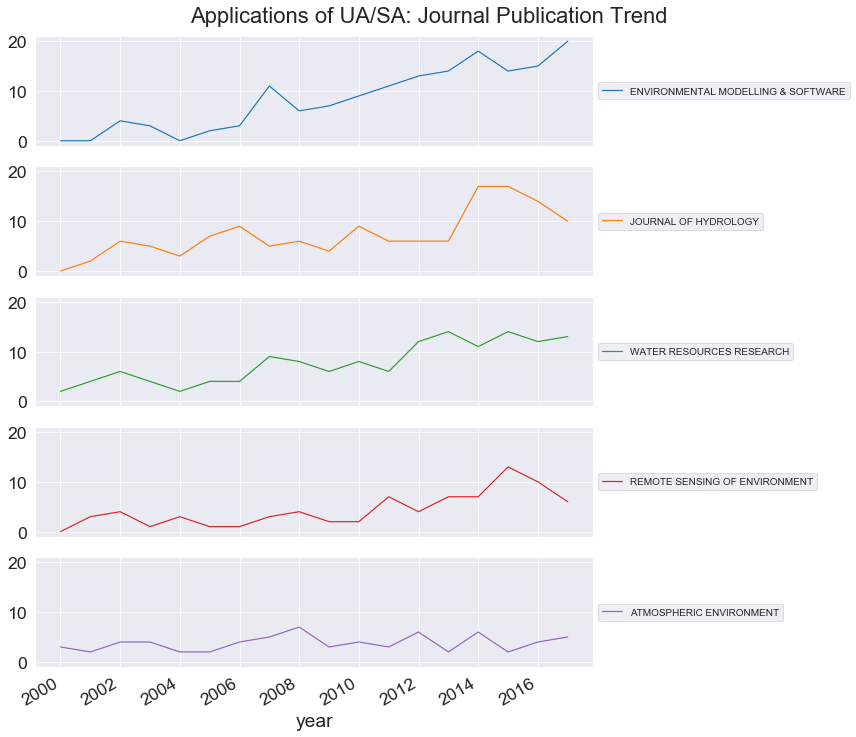

In [33]:
wos_plot.plot_journal_pub_trend(all_applications, 
                                top_n=5, 
                                save_plot_fn='figs/applications_journal_pub_trend.png', 
                                title='Applications of UA/SA: Journal Publication Trend')

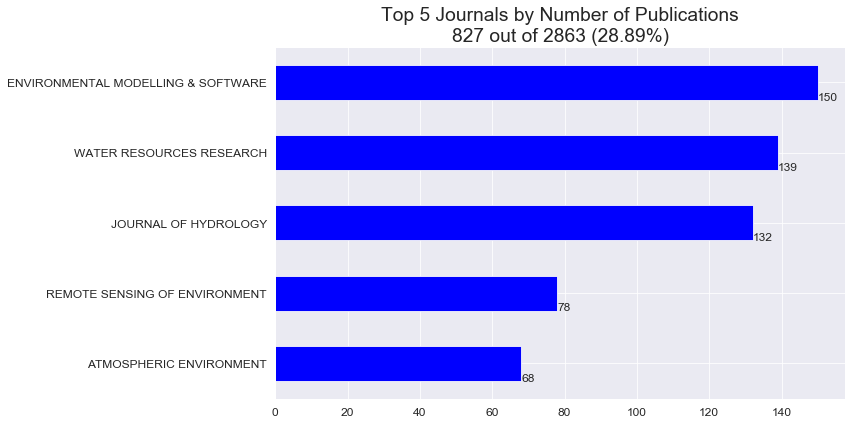

In [34]:
wos_plot.plot_pubs_per_journal(all_applications, 
                               top_n=5, annotate=True, 
                               show_stats=True, 
                               save_plot_fn='figs/app_journal_pubs.png')

In [35]:
all_applications

<metaknowledge.RecordCollection object Applications>

In [36]:
journals_of_interest_app = map(str.upper, ['Environmental Modelling & Software', 
                                           'Water Resources Research',
                                           'Journal of Hydrology',
                                           'Remote Sensing of Environment',
                                           'Atmospheric Environment'])
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, list(journals_of_interest_app))

In [37]:
data_dir = "tmp"  # Using the temporary data directory

paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [38]:
# Same process as above (should be moved into a function but fine for now)
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest][0:10], ignore_index=True)

In [39]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)
top_cited_in_top_journals_app.head(10)

,AU,year,title,journal,citations,DOI link,id
0,"Huete, A|Didan, K|Miura, T|Rodriguez, EP|Gao, ...",2002,Overview of the radiometric and biophysical pe...,Applications_REMOTE SENSING OF ENVIRONMENT,2944,https://dx.doi.org/10.1016/S0034-4257(02)00096-2,WOS:000179160200014
21,"Vardoulakis, S|Fisher, BEA|Pericleous, K|Gonza...",2003,Modelling air quality in street canyons: a review,Applications_ATMOSPHERIC ENVIRONMENT,489,https://dx.doi.org/10.1016/S1352-2310(02)00857-9,WOS:000180455000001
11,"Yang, J|Reichert, P|Abbaspour, KC|Xia, J|Yang, H",2008,Comparing uncertainty analysis techniques for ...,Applications_JOURNAL OF HYDROLOGY,313,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012,WOS:000258853700001
1,"Olofsson, P|Foody, GM|Stehman, SV|Woodcock, CE",2013,Making better use of accuracy data in land cha...,Applications_REMOTE SENSING OF ENVIRONMENT,262,https://dx.doi.org/10.1016/j.rse.2012.10.031,WOS:000315308300011
2,"Brandtberg, T|Warner, TA|Landenberger, RE|McGr...",2003,Detection and analysis of individual leaf-off ...,Applications_REMOTE SENSING OF ENVIRONMENT,246,https://dx.doi.org/10.1016/S0034-4257(03)00008-7,WOS:000182715300004
31,"Pappenberger, F|Beven, KJ",2006,Ignorance is bliss: Or seven reasons not to us...,Applications_WATER RESOURCES RESEARCH,244,https://dx.doi.org/10.1029/2005WR004820,WOS:000238016000004
32,"Thiemann, M|Trosset, M|Gupta, H|Sorooshian, S",2001,Bayesian recursive parameter estimation for hy...,Applications_WATER RESOURCES RESEARCH,240,https://dx.doi.org/10.1029/2000WR900405,WOS:000171211300008
12,"McVicar, TR|Van Niel, TG|Li, LT|Hutchinson, MF...",2007,Spatially distributing monthly reference evapo...,Applications_JOURNAL OF HYDROLOGY,203,https://dx.doi.org/10.1016/j.jhydrol.2007.02.018,WOS:000247196600003
13,"Pappenberger, F|Beven, K|Horritt, M|Blazkova, S",2005,Uncertainty in the calibration of effective ro...,Applications_JOURNAL OF HYDROLOGY,201,https://dx.doi.org/10.1016/j.jhydrol.2004.06.036,WOS:000226396500004
14,"Gong, LB|Xu, CY|Chen, DL|Halldin, S|Chen, YQD",2006,Sensitivity of the Penman-Monteith reference e...,Applications_JOURNAL OF HYDROLOGY,197,https://dx.doi.org/10.1016/j.jhydrol.2006.03.027,WOS:000241295200022


In [40]:
top_cited_in_top_journals_app.to_csv('../data/app_top_cited_in_top_journals.csv', index=False)

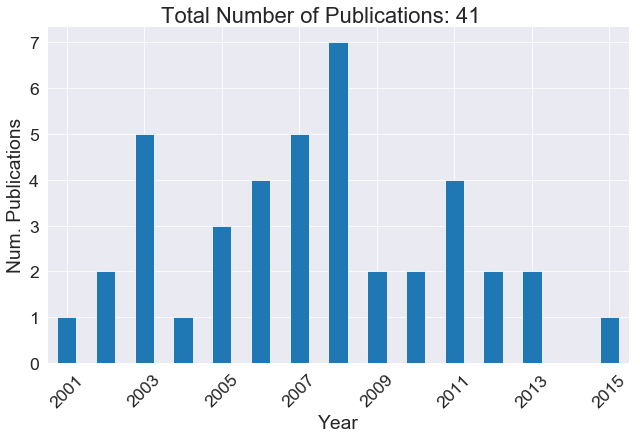

In [41]:
# top_cited_in_top_journals_app.groupby('year').count()['AU'].plot()
applications_top_cited = wosis.extract_recs(top_cited_in_top_journals_app.id, RC)
wos_plot.plot_pub_trend(applications_top_cited)